# Python for Data Science Quiz

## This quiz is to test your understanding on the concepts learnt in class during the 
## Python for Data Science Course. 
## Background of the data - The dataset to be used for the quiz pertains to the 
## number of hospitalisations under the scheme Ayushman Bharat - Pradhan 
## Mantri Jan Arogya Yojana (AB-PMJAY), this data is as on 19 June, 2019.
## The data contains number of cases of hospitalisation in public and private hospitalisations 
## state/ UT wise and on an all India level.
## PMJAY is a scheme which provides health cover of Rs. 5 Lakhs per family per year, for 
## secondary and tertiary care hospitalization across public and private empaneled hospitals
## in India. State/UT contains the list of states and union territories, Public column contains
## hospitalisations in public hospitals and Private column contains list of hospitalisations in 
## private hospitals. 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Question 1: Import the dataset.

In [68]:
hosp = pd.read_csv('hospital.csv')

## Question 2: How many rows and columns does the data set have?

In [69]:
print('Data set contains {} rows and {} columns.'.format(hosp.shape[0],hosp.shape[1]))
print('\n')
hosp.info()

Data set contains 32 rows and 3 columns.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State/UT  32 non-null     object 
 1   Private   30 non-null     float64
 2   Public    30 non-null     float64
dtypes: float64(2), object(1)
memory usage: 896.0+ bytes


## Question 3: Does the data set have missing values? If yes, how many?

In [70]:
hosp.isnull().sum()

State/UT    0
Private     2
Public      2
dtype: int64

## Question 4: Drop the NA values.

In [71]:
hosp.dropna(axis = 0,inplace = True)
hosp

,State/UT,Private,Public
0,Andaman and Nicobar Islands,1.0,21.0
1,Andhra Pradesh,97863.0,34385.0
2,Arunachal Pradesh,5.0,630.0
3,Assam,14350.0,33553.0
4,Bihar,11747.0,34814.0
5,Chandigarh,302.0,509.0
6,Chhattisgarh,411814.0,142123.0
7,Dadra and Nagar Haveli,782.0,10940.0
8,Daman and Diu,984.0,3343.0
9,Goa,1033.0,382.0


## Question 5: Create a new column Total which contains a sum of private and public
## hospitalisations. So the column Total should be a summation of the two columns
## Public and Private.

In [72]:
hosp['Total'] = hosp['Public']+hosp['Private']

## Question 6: Which State or UT is the unhealthiest? (i.e. maximum number of hospitalisations) 
## HINT : Do not include Grand Total

In [73]:
hosp.sort_values(by = 'Total',ascending=False).head()

,State/UT,Private,Public,Total
31,Grand Total,1697117.0,1238196.0,2935313.0
6,Chhattisgarh,411814.0,142123.0,553937.0
16,Kerala,131557.0,391079.0,522636.0
10,Gujarat,379379.0,94845.0,474224.0
26,Tamil Nadu,120473.0,116701.0,237174.0


## Question 7: Chhattisgarh accounts for roughly 18% share in the total hospitalisations in India (assuming these are the only states/UTs in India). True for False?

In [74]:
hosp[hosp['State/UT']=='Chhattisgarh']


,State/UT,Private,Public,Total
6,Chhattisgarh,411814.0,142123.0,553937.0


In [75]:
hosp[hosp['State/UT']=='Grand total']

,State/UT,Private,Public,Total


In [76]:
acc = 553937/2935313*100 
print('Chhattisgarh shares {}% of hospitalisations in india. So the statement is True.'.format(acc))

Chhattisgarh shares 18.87147980470907% of hospitalisations in india. So the statement is True.


## Question 8: In Dadra and Nagar Haveli, which type of hospitals do people prefer?

In [77]:
hosp[hosp['State/UT']=='Dadra and Nagar Haveli']
## In Dadra and Haveli people prefers Public Hospitals more than Private.

,State/UT,Private,Public,Total
7,Dadra and Nagar Haveli,782.0,10940.0,11722.0


## Question 9: Plot the total hospitalisations in a plot of your choice and comment on the 
## healthiest State/UT. (Assuming that the only parameter for Healthiest is the number of 
## hospitalisations only)

<Figure size 864x864 with 0 Axes>

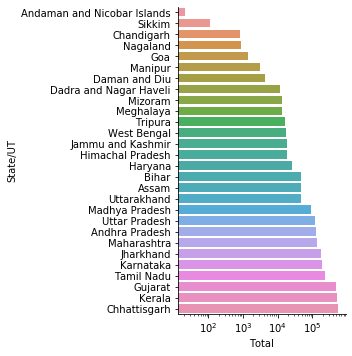

In [78]:
plt.figure(figsize=(12,12))
sns.catplot(x = 'Total',y = 'State/UT',kind = 'bar',data = hosp_copy.sort_values(by = 'Total',ascending= True))

plt.xscale('log')
plt.show()

In [51]:
hosp_copy = hosp.drop([2])
find_healthy = hosp_copy.groupby(['State/UT']).sum()['Total'].sort_values()
find_healthy.index
                            

Index(['Andaman and Nicobar Islands', 'Sikkim', 'Chandigarh', 'Nagaland',
       'Goa', 'Manipur', 'Daman and Diu', 'Dadra and Nagar Haveli', 'Mizoram',
       'Meghalaya', 'Tripura', 'West Bengal', 'Jammu and Kashmir',
       'Himachal Pradesh', 'Haryana', 'Bihar', 'Assam', 'Uttarakhand',
       'Madhya Pradesh', 'Uttar Pradesh', 'Andhra Pradesh', 'Maharashtra',
       'Jharkhand', 'Karnataka', 'Tamil Nadu', 'Gujarat', 'Kerala',
       'Chhattisgarh', 'Grand Total'],
      dtype='object', name='State/UT')

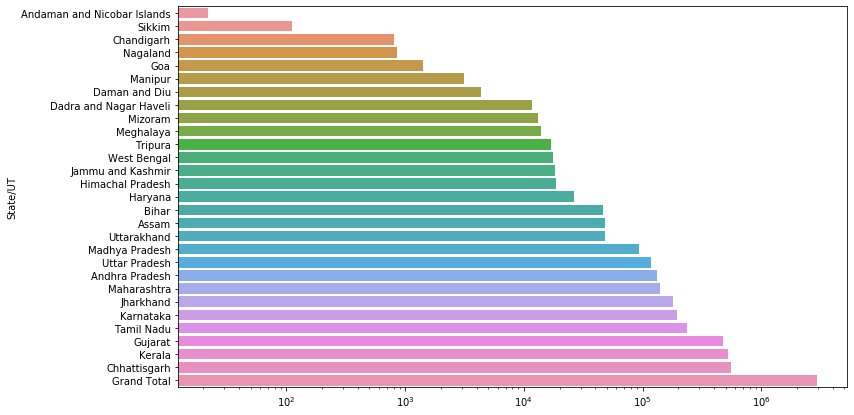

In [55]:
plt.figure(figsize=(12,7))
sns.barplot(x = find_healthy.values ,y=find_healthy.index)
plt.xscale('log')
plt.show()

In [79]:
# Anndaman and Nicobar Islands has less number of hospitals so it is most healthiest UT of India.

## Question 10: Public Hospitalisations are more on an all India level as compared to state/UT level. True or False? 
## HINT: Calculate the percentage of public hospitalisation (public/total), then find out the average percentage of all states using the mean() function. Compare this average percentage (state) with the grand total (all India) percentage and comment.

In [82]:
hosp['Public_per'] = hosp['Public']/hosp['Total']
hosp.head(2)

,State/UT,Private,Public,Total,Public_per
0,Andaman and Nicobar Islands,1.0,21.0,22.0,0.954545
1,Andhra Pradesh,97863.0,34385.0,132248.0,0.260004


In [83]:
hosp_copy['Public_per'] = hosp_copy['Public']/hosp_copy['Total']

In [84]:
hosp_copy['Public_per'].mean()

0.576299761386152

## Question 11: Which States/UTs have more than 50000 hospitalisations?

In [88]:
hosp_copy[hosp_copy['Total']>50000].sort_values(by = 'Total',ascending =False)['State/UT']

6       Chhattisgarh
16            Kerala
10           Gujarat
26        Tamil Nadu
15         Karnataka
14         Jharkhand
19       Maharashtra
1     Andhra Pradesh
28     Uttar Pradesh
18    Madhya Pradesh
Name: State/UT, dtype: object

## Question 12: Which state reported exactly 1 case of private hospitalisation?

In [89]:
hosp[hosp['Private']==1]['State/UT']

0    Andaman and Nicobar Islands
Name: State/UT, dtype: object

## Question 13: Which State/UT has maximum number of people admitted to public hospitals?

In [91]:
hosp_copy[hosp_copy['Public']== hosp_copy['Public'].max()]['State/UT']

16    Kerala
Name: State/UT, dtype: object

## Question 14: Which state among Tripura and Gujarat witnessed more hospitalisations? 
## (in absolute numbers)

In [93]:
hosp[hosp['State/UT']=='Tripura']

,State/UT,Private,Public,Total,Public_per
27,Tripura,90.0,16702.0,16792.0,0.99464


In [94]:
hosp[hosp['State/UT']=='Gujarat']

,State/UT,Private,Public,Total,Public_per
10,Gujarat,379379.0,94845.0,474224.0,0.2


## Question 15: Are there any extreme values/ outliers present in this data set? Do these
## values impact the analysis?

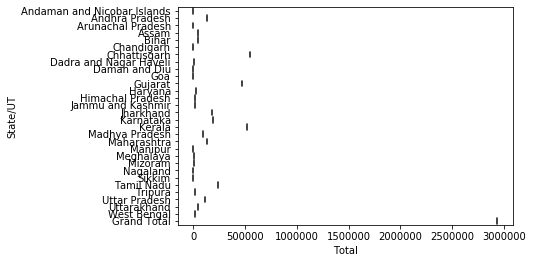

In [95]:
sns.boxplot(hosp['Total'],hosp['State/UT'])

THE END!